In [1]:
import networkx as nx
import os
import glob
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import pickle
import networkx as nx
import matplotlib as mlp
# mlp.use("Qt5Agg")
import matplotlib.pyplot as plt
import community
import scipy
import bct


import seaborn as sns
from IPython.display import HTML

In [2]:
def onetoughjar(path2dic):
    with open(path2dic, 'rb') as pickle_file:
        try:
            while True:
                output = pickle.load(pickle_file)
        except EOFError:
            pass
    return(output)

# Load data

In [3]:
ALL_DATA=onetoughjar('/Users/gracer/Google Drive/HCP_graph/1200/datasets/finalApril6.pkl')

In [4]:
dfs=ALL_DATA['dfs']
graphs=ALL_DATA['graphs']
zscores_thr=ALL_DATA['zscores_thr']
nega_graphs=ALL_DATA['nega_graphs']
dfs=ALL_DATA['dfs']
subgraphs=ALL_DATA['subgraphs']
community_graphs=ALL_DATA['community_graphs']

In [5]:
labels=pd.read_csv('/Users/gracer/Google Drive/HCP_graph/1200/brains/labels4table.csv',sep=',')

In [6]:
node_df=pd.read_csv('/Users/gracer/Google Drive/HCP_graph/1200/datasets/early_late_nodes_new_to_load.csv',sep=',')

In [7]:
del labels['Unnamed: 0']
del node_df['group']

In [9]:
def module_fig(G, group, IC):
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    #nodes, size = zip(*nx.get_node_attributes(G,'clustering').items())

    positions=nx.circular_layout(G)
    plt.figure(figsize=(3,3))
    fntsze = 18
    ### NODES ####
    color = np.array(list(G.nodes))
    color = np.array(color)
    n_color=len(list(set(color)))
    nColormap = plt.get_cmap('Set3', n_color)

    y=nx.draw_networkx_nodes(G,positions,
                           node_color=color,
                           node_size=150,
                           alpha=1.0,
                           cmap= nColormap,
                           vmin=0,vmax=n_color )

    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=fntsze,
                            font_family='sans-serif', fontweight = 'bold')
    
    ### EDGES ####
    weights=np.array(weights)

    m=weights.min()
    M=weights.max()
    
    eColormap=plt.cm.gist_rainbow
    
    x=nx.draw_networkx_edges(G, positions, 
                             edge_list=edges,
                             style='solid', 
                             width = weights/5,
                             edge_color = weights, 
                             edge_vmin=m, 
                             edge_vmax=M, 
                             edge_cmap= eColormap)


    sm = plt.cm.ScalarMappable(cmap=eColormap, norm=plt.Normalize(vmin = m, vmax=M))
    sm._A = []
    edge_bar=plt.colorbar(sm)

    plt.axis('off')
#     basepath='/Users/gracer/Google Drive/HCP_graph/1200/manuscripts_talks/manuscripts/figures/module'
#     plt.savefig(os.path.join(basepath,"modularity_%s_%s.png"%(IC,group)), format="PNG")
    

# Figures

IC2
IC3
IC6
IC12


/Users/gracer/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/gracer/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/gracer/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/gracer/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/gracer/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


IC13
IC2
IC3
IC6
IC12
IC13


/Users/gracer/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/gracer/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/gracer/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/gracer/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/gracer/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


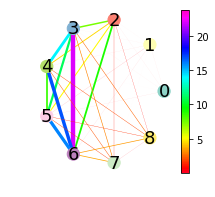

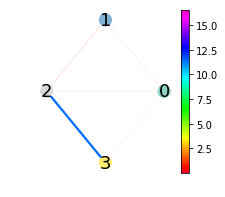

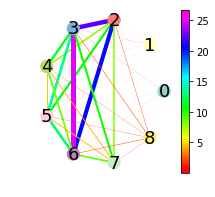

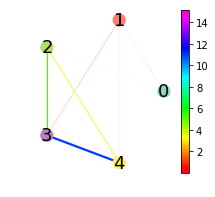

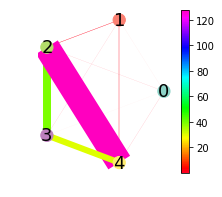

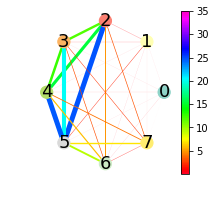

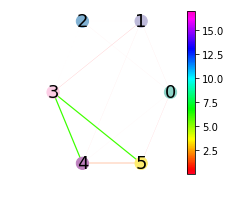

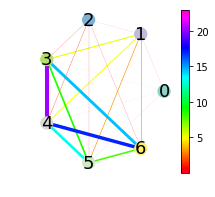

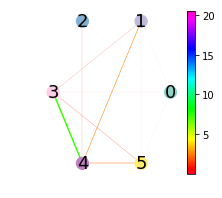

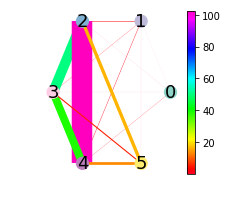

In [10]:
typ=['late', 'early']
ICs=['IC2','IC3','IC6','IC12','IC13']
for t in typ:
    for ic in ICs:
        print(ic)
        G=community_graphs['%s'%t]['int']['%s'%ic]
        group='%s onset of menstruation'%t
        IC='%s'%ic
        module_fig(G, group, IC)

# Table of modules

### The hubness of a node can be defined by its within-module  degree: 
If a given node  i  has a value of    
zi  >  2.5. It is classified as  a hub, otherwise as a non-hub.

### For hubs    
0  <   Pi  <  0.30    provincial hub   
0.30  <   Pi  <  0.75   connector hub   
0.75  <   Pi  <  1.0 is a  kinless hub. 

### For non-hubs    
0  <   Pi  <  0.05,  ultra peripheral   node  
0.05  <   Pi  <  0.62  peripheral  node  
0.62  <   Pi  <  0.80  connector node  
0.80  <   Pi  <  1.0    kinless node  

In [18]:
node_df['hub'] = (node_df['zDegree'] > 2.5)
node_df['hub'].value_counts()

False    569
Name: hub, dtype: int64

In [19]:
node_df['ultra_peripheral'] = (node_df['PC'] > 0) & (node_df['PC'] <= 0.05)
node_df['peripheral'] = (node_df['PC'] > 0.05) & (node_df['PC'] <= 0.62)
node_df['connector'] = (node_df['PC'] > 0.62) & (node_df['PC'] <= 0.80)
node_df['kinless'] = (node_df['PC'] > 0.80) & (node_df['PC'] <= 1.00)


In [20]:
print(node_df['ultra_peripheral'].value_counts())
print(node_df['peripheral'].value_counts())
print(node_df['connector'].value_counts())
print(node_df['kinless'].value_counts())

False    569
Name: ultra_peripheral, dtype: int64
False    544
True      25
Name: peripheral, dtype: int64
False    530
True      39
Name: connector, dtype: int64
False    331
True     238
Name: kinless, dtype: int64


In [21]:
node_df=node_df.merge(labels,how='outer',left_on=['node'],right_on=['key'])

In [22]:
pd.set_option('display.max_rows', 600)
node_df.dropna(axis=0)

,Unnamed: 0,cc,btw,module,early_late,IC,node,PC,zDegree,area_x,key_x,hub,ultra_peripheral,peripheral,connector,kinless,area_y,key_y
0,0.0,0.900000,0.000397,0.0,late,IC2,BMI,0.000000,0.707107,BMI,BMI,False,False,False,False,False,BMI,BMI
1,0.0,0.800000,0.010397,0.0,late,IC3,BMI,0.489796,0.000000,BMI,BMI,False,False,True,False,False,BMI,BMI
2,0.0,0.583333,0.006129,0.0,late,IC6,BMI,0.471074,0.632456,BMI,BMI,False,False,True,False,False,BMI,BMI
3,0.0,0.700000,0.025755,0.0,late,IC12,BMI,0.489796,0.000000,BMI,BMI,False,False,True,False,False,BMI,BMI
4,0.0,0.523810,0.009212,0.0,late,IC13,BMI,0.555556,0.816497,BMI,BMI,False,False,True,False,False,BMI,BMI
5,0.0,0.488889,0.021970,0.0,early,IC2,BMI,0.750000,1.069045,BMI,BMI,False,False,False,True,False,BMI,BMI
6,0.0,0.666667,0.007143,0.0,early,IC3,BMI,0.555556,0.000000,BMI,BMI,False,False,True,False,False,BMI,BMI
7,0.0,0.476190,0.007009,0.0,early,IC6,BMI,0.555556,0.816497,BMI,BMI,False,False,True,False,False,BMI,BMI
8,0.0,0.666667,0.002451,0.0,early,IC12,BMI,0.360000,0.000000,BMI,BMI,False,False,True,False,False,BMI,BMI
9,0.0,0.666667,0.005032,0.0,early,IC13,BMI,0.305556,1.000000,BMI,BMI,False,False,True,False,False,BMI,BMI


In [23]:
node_df.to_csv('/Users/gracer/Google Drive/HCP_graph/1200/datasets/nodal_data.csv', sep=',', index= False)

In [16]:
result = node_df.groupby(['early_late','IC','module'], as_index=False).agg(
                      {'cc':['mean','std'],'btw':['mean','std'],'PC':['mean','std'],'zDegree':['mean','std'],
                       'hub':'sum', 'ultra_peripheral':'sum','peripheral':'sum', 'connector':'sum','kinless':'sum'})

In [17]:
pd.set_option('display.max_rows', 500)
result

early_late    IC module        cc                 btw                  PC  \
                                mean       std      mean       std      mean   
0       early  IC12    0.0  0.622222  0.038490  0.011823  0.008848  0.568980   
1       early  IC12    1.0  0.843157  0.035320  0.017205  0.007888  0.955795   
2       early  IC12    2.0  0.690909       NaN  0.097804       NaN  0.976331   
3       early  IC12    3.0  0.885548  0.111769  0.016601  0.027817  0.871464   
4       early  IC12    4.0  0.886485  0.034897  0.009568  0.003280  0.721773   
5       early  IC12    5.0  0.700000       NaN  0.088645       NaN  0.987654   
6       early  IC13    0.0  0.607024  0.217602  0.011960  0.009659  0.598402   
7       early  IC13    1.0  0.823715  0.154756  0.015360  0.008123  0.941632   
8       early  IC13    2.0  0.981089  0.023619  0.002185  0.003956  0.836596   
9       early  IC13    3.0  0.971079  0.016406  0.002092  0.003473  0.959979   
10      early  IC13    4.0  0.966565  0.026426  0.005637  0.011188  0.877887   
11      early  IC13    5.0  0.952347  0.001006  0.008964  0.000465  0.994375   
12      early   IC2    0.0  0.513333  0.056328  0.009243  0.007657  0.559601   
13      early   IC2    1.0  0.822222  0.094281  0.016219  0.009701  0.963750   
14      early   IC2    2.0  0.968047  0.024428  0.002490  0.002900  0.969560   
15      early   IC2    3.0  0.967962  0.026149  0.002469  0.002918  0.969177   
16      early   IC2    4.0  0.949741  0.046852  0.007364  0.009824  0.945491   
17      early   IC2    5.0  0.966153  0.025624  0.003480  0.004927  0.897687   
18      early   IC2    6.0  0.881573  0.020708  0.024464  0.017166  0.987177   
19      early   IC2    7.0  0.913492  0.033953  0.013502  0.011086  0.992854   
20      early   IC3    0.0  0.530159  0.133447  0.027090  0.017522  0.677165   
21      early   IC3    1.0  0.345455  0.488547  0.057937  0.075200  0.692123   
22      early   IC3    2.0  0.500000       NaN  0.021746       NaN  0.918367   
23      early   IC3    3.0  0.933670  0.068573  0.007513  0.010263  0.676501   
24      early   IC3    4.0  0.806061  0.068568  0.028280  0.016275  0.950414   
25      early   IC3    5.0  0.734848  0.117851  0.073069  0.047964  0.950414   
26      early   IC6    0.0  0.521905  0.048164  0.007220  0.007365  0.480471   
27      early   IC6    1.0  0.880679  0.055974  0.030869  0.025575  0.966694   
28      early   IC6    2.0  0.910769       NaN  0.006339       NaN  0.994898   
29      early   IC6    3.0  0.957672  0.023735  0.003779  0.005290  0.925325   
30      early   IC6    4.0  0.941354  0.026917  0.003755  0.003167  0.911353   
31      early   IC6    5.0  0.916735  0.030543  0.014672  0.018461  0.972617   
32      early   IC6    6.0  0.982906  0.000000  0.000599  0.000000  0.957194   
33       late  IC12    0.0  0.733333  0.194365  0.027369  0.023739  0.397242   
34       late  IC12    1.0  0.635897  0.333609  0.027350  0.010179  0.909687   
35       late  IC12    2.0  0.887393  0.184050  0.077783  0.134253  0.932625   
36       late  IC12    3.0  0.947497  0.061476  0.008351  0.012094  0.791013   
37       late  IC12    4.0  0.954670  0.065018  0.013908  0.026727  0.892253   
38       late  IC13    0.0  0.709762  0.175652  0.012248  0.016964  0.516440   
39       late  IC13    1.0  0.957143       NaN  0.003195       NaN  0.997230   
40       late  IC13    2.0  0.965629  0.029809  0.003346  0.003184  0.804755   
41       late  IC13    3.0  0.982908  0.033515  0.001621  0.003520  0.977451   
42       late  IC13    4.0  0.975248  0.036547  0.005754  0.013345  0.823577   
43       late   IC2    0.0  0.714021  0.218253  0.025992  0.036978  0.256655   
44       late   IC2    1.0  0.919118       NaN  0.007672       NaN  0.988920   
45       late   IC2    2.0  0.967534  0.051967  0.009561  0.016461  0.984003   
46       late   IC2    3.0  0.966174  0.025213  0.007827  0.011860  0.935744   
47       late   IC2    4.0  0.964114  0.045767  0.008033  0.010922  0.964300   
48 